Before running the code just dont run the model.fit sections because training is already done ! 
and load the "xxx.h5" file codes to load the model into the variables 
also for testing make a test/valid folder in which paste photos which you need to test ! 

In [1]:
#all the packages needed for running this program
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
print(tf.__version__)
#here it should have tf version 2.0 or 2.1

2.1.0


In [3]:
#declaring for the use in ImageDataGenerator to load images into batches
train_path = 'tomato/New Plant Diseases Dataset(Augmented)/train'
test_path = 'test/valid'
test_path_custom = 'test/valid'
valid_path = 'tomato/New Plant Diseases Dataset(Augmented)/valid'

In [15]:
#F:\Project\JupyterWorkspace\tomato\tomato\New Plant Diseases Dataset(Augmented)\train
#declaring for the use in ImageDataGenerator to load images into batches
"""train_path = 'F:\\Project\\JupyterWorkspace\\tomato\\tomato\\New Plant Diseases Dataset(Augmented)\\train'
test_path = 'F:\\Project\\JupyterWorkspace\\tomato\\test\\valid\\cm'
test_path_custom = 'F:\\Project\\JupyterWorkspace\\tomato\\test\\valid'
valid_path = 'F:\\Project\\JupyterWorkspace\\tomato\\tomato\\New Plant Diseases Dataset(Augmented)\\valid'"""

In [16]:
image_gen_train = ImageDataGenerator(rescale=1./255)


In [20]:
#creating batches of datasets to mass in model.fit function
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=64)
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=5)
test_batches_custom = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path_custom, target_size=(256,256),classes=['unqualified'], batch_size=5)
valid_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=64)
train_batches1 = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=128)
test_batches1 = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=10, shuffle=True)
valid_batches1 = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=128)

Found 14310 images belonging to 10 classes.
Found 10 images belonging to 10 classes.
Found 6 images belonging to 1 classes.
Found 4320 images belonging to 10 classes.
Found 14310 images belonging to 10 classes.
Found 10 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.


In [18]:
#For ploting images with are converted in the batches above
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [21]:
#For ploting images with are converted in the batches above
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [22]:
"""
this is used only to traverse from one batch to other
imgs, labels = next(train_batches)"""

'\nthis is used only to traverse from one batch to other\nimgs, labels = next(train_batches)'

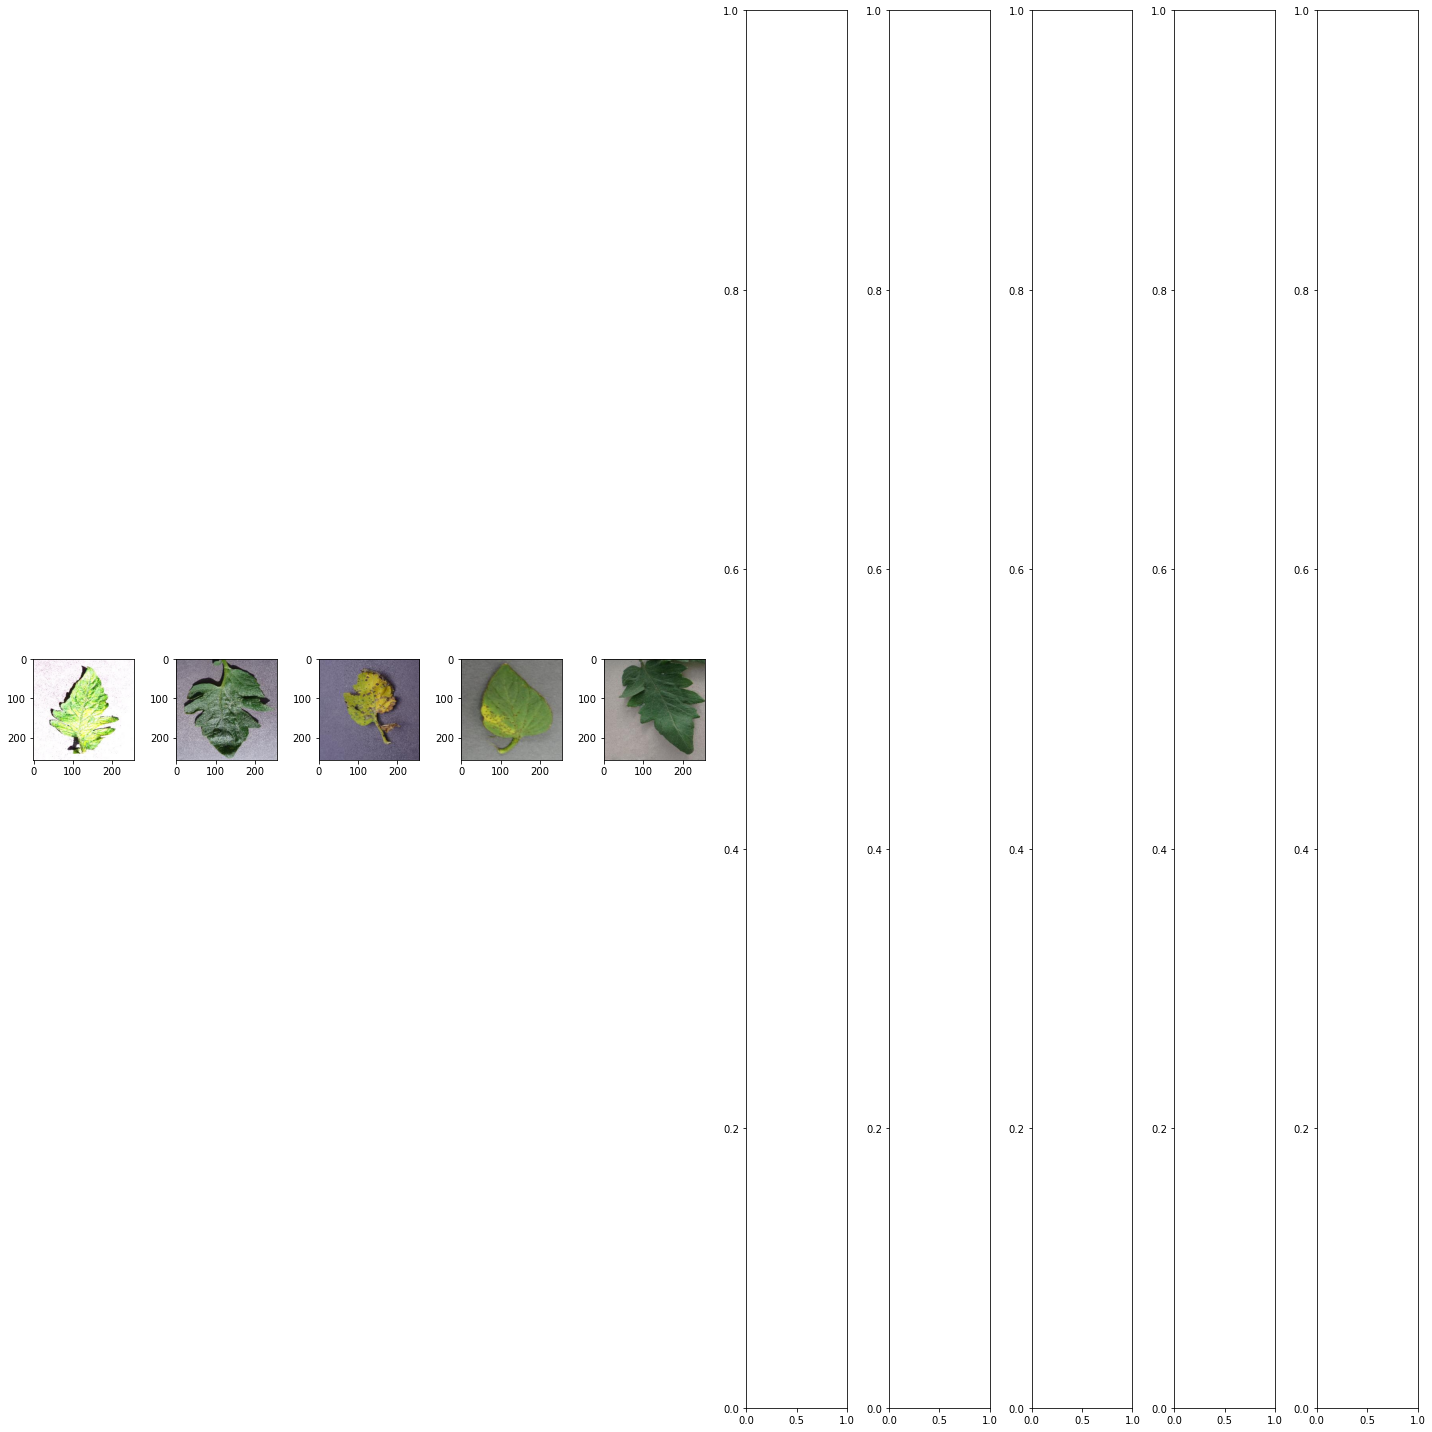

In [26]:
#You can edit the numbers in the array's index and then accordingly images would be displayed of the batches
augmented_images = [valid_batches[15][0][i] for i in range(5)]
plotImages(augmented_images)

In [13]:
#A function for simple feature extraction it will keep the values i.e its features like colour and heatmaps 
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(256, 256, 3)), 
        tf.keras.layers.Dense(512, activation=tf.nn.relu),    
        tf.keras.layers.Dense(256, activation=tf.nn.tanh),
        tf.keras.layers.Dense(128, activation=tf.nn.tanh),
        tf.keras.layers.Dense(64, activation=tf.nn.tanh),
        tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model


In [10]:
#this is the second  model which performs CNN and does the part of edge and shape detection in leaves
def create_model2():
    model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', 
                   input_shape=(256, 256 ,3)),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model



In [14]:
#you have to do this for every new model type
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               100663808 
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 100,836,938
Trainable params: 100,836,938
Non-trainable params: 0
__________________________________________

In [ ]:
#this is for second model type
model2 = create_model2()
model2.summary()

In [13]:
#this is main training part !
history = model.fit_generator(train_batches, validation_data=valid_batches, epochs=90)

Epoch 1/50
448/448 [==============================] - 98s 220ms/step - loss: 1.1406 - accuracy: 0.6023 - val_loss: 0.7450 - val_accuracy: 0.7331
Epoch 2/50
448/448 [==============================] - 96s 215ms/step - loss: 0.4741 - accuracy: 0.8354 - val_loss: 0.4224 - val_accuracy: 0.8491
Epoch 3/50
448/448 [==============================] - 96s 215ms/step - loss: 0.2722 - accuracy: 0.9092 - val_loss: 0.3160 - val_accuracy: 0.8938
Epoch 4/50
448/448 [==============================] - 96s 215ms/step - loss: 0.1946 - accuracy: 0.9341 - val_loss: 0.2257 - val_accuracy: 0.9257
Epoch 5/50
448/448 [==============================] - 96s 214ms/step - loss: 0.1025 - accuracy: 0.9660 - val_loss: 0.3075 - val_accuracy: 0.9109
Epoch 6/50
448/448 [==============================] - 96s 214ms/step - loss: 0.0983 - accuracy: 0.9679 - val_loss: 0.4307 - val_accuracy: 0.8773
Epoch 7/50
448/448 [==============================] - 96s 214ms/step - loss: 0.0798 - accuracy: 0.9746 - val_loss: 0.2549 - val_ac

In [15]:
history = model2.fit_generator(
    train_batches,
    #steps_per_epoch=int(np.ceil(14310 / float(32))),
    epochs=90,
    validation_data=valid_batches,
    #validation_steps=int(np.ceil(4320 / float(32)))
)

Epoch 1/60
224/224 [==============================] - 880s 4s/step - loss: 2.1721 - accuracy: 0.1900 - val_loss: 2.3431 - val_accuracy: 0.1912
Epoch 2/60
224/224 [==============================] - 31s 139ms/step - loss: 2.0582 - accuracy: 0.2549 - val_loss: 2.2345 - val_accuracy: 0.2153
Epoch 3/60
224/224 [==============================] - 31s 138ms/step - loss: 1.9348 - accuracy: 0.2893 - val_loss: 2.2544 - val_accuracy: 0.2169
Epoch 4/60
224/224 [==============================] - 31s 138ms/step - loss: 1.8970 - accuracy: 0.3093 - val_loss: 2.1753 - val_accuracy: 0.2322
Epoch 5/60
224/224 [==============================] - 31s 139ms/step - loss: 1.8595 - accuracy: 0.3177 - val_loss: 2.0942 - val_accuracy: 0.2495
Epoch 6/60
224/224 [==============================] - 31s 139ms/step - loss: 1.8153 - accuracy: 0.3344 - val_loss: 2.0752 - val_accuracy: 0.2576
Epoch 7/60
224/224 [==============================] - 31s 139ms/step - loss: 1.7629 - accuracy: 0.3625 - val_loss: 2.0166 - val_accu

In [16]:
history2 = model.fit_generator(
    train_batches,
    #steps_per_epoch=int(np.ceil(14310 / float(32))),
    epochs=80,
    validation_data=valid_batches,
    #validation_steps=int(np.ceil(4320 / float(32)))
)

Epoch 1/80
224/224 [==============================] - 32s 144ms/step - loss: 0.6495 - accuracy: 0.7817 - val_loss: 0.9655 - val_accuracy: 0.6738
Epoch 2/80
224/224 [==============================] - 31s 139ms/step - loss: 0.6475 - accuracy: 0.7850 - val_loss: 0.8847 - val_accuracy: 0.6928
Epoch 3/80
224/224 [==============================] - 31s 139ms/step - loss: 0.6330 - accuracy: 0.7876 - val_loss: 0.9084 - val_accuracy: 0.6928
Epoch 4/80
224/224 [==============================] - 31s 138ms/step - loss: 0.6109 - accuracy: 0.7969 - val_loss: 0.8996 - val_accuracy: 0.6910
Epoch 5/80
224/224 [==============================] - 31s 139ms/step - loss: 0.5980 - accuracy: 0.8022 - val_loss: 0.9103 - val_accuracy: 0.6977
Epoch 6/80
224/224 [==============================] - 31s 139ms/step - loss: 0.5883 - accuracy: 0.8023 - val_loss: 0.8931 - val_accuracy: 0.6921
Epoch 7/80
224/224 [==============================] - 31s 139ms/step - loss: 0.5633 - accuracy: 0.8120 - val_loss: 0.8404 - val_ac

In [17]:
history3 = model.fit_generator(
    train_batches,
    #steps_per_epoch=int(np.ceil(14310 / float(32))),
    epochs=80,
    validation_data=valid_batches,
    #validation_steps=int(np.ceil(4320 / float(32)))
)

Epoch 1/80
112/112 [==============================] - 33s 293ms/step - loss: 0.2347 - accuracy: 0.9238 - val_loss: 0.7239 - val_accuracy: 0.7810
Epoch 2/80
112/112 [==============================] - 31s 273ms/step - loss: 0.2144 - accuracy: 0.9297 - val_loss: 0.8424 - val_accuracy: 0.7632
Epoch 3/80
112/112 [==============================] - 30s 265ms/step - loss: 0.2142 - accuracy: 0.9305 - val_loss: 0.7211 - val_accuracy: 0.7884
Epoch 4/80
112/112 [==============================] - 31s 275ms/step - loss: 0.2096 - accuracy: 0.9300 - val_loss: 0.8586 - val_accuracy: 0.7470
Epoch 5/80
112/112 [==============================] - 29s 262ms/step - loss: 0.2184 - accuracy: 0.9271 - val_loss: 0.9461 - val_accuracy: 0.7303
Epoch 6/80
112/112 [==============================] - 29s 259ms/step - loss: 0.2264 - accuracy: 0.9238 - val_loss: 0.7259 - val_accuracy: 0.7819
Epoch 7/80
112/112 [==============================] - 30s 266ms/step - loss: 0.2285 - accuracy: 0.9240 - val_loss: 0.8133 - val_ac

In [96]:
history4 = model.fit_generator(
    train_batches,
    #steps_per_epoch=int(np.ceil(14310 / float(32))),
    epochs=100,
    validation_data=valid_batches,
    #validation_steps=int(np.ceil(4320 / float(32)))
)

Epoch 1/100
112/112 [==============================] - 35s 315ms/step - loss: 0.1862 - accuracy: 0.9365 - val_loss: 0.7812 - val_accuracy: 0.7937
Epoch 2/100
112/112 [==============================] - 29s 262ms/step - loss: 0.1407 - accuracy: 0.9532 - val_loss: 0.6125 - val_accuracy: 0.8319
Epoch 3/100
112/112 [==============================] - 30s 264ms/step - loss: 0.0982 - accuracy: 0.9703 - val_loss: 0.6482 - val_accuracy: 0.8289
Epoch 4/100
112/112 [==============================] - 29s 262ms/step - loss: 0.0874 - accuracy: 0.9729 - val_loss: 0.8443 - val_accuracy: 0.7912
Epoch 5/100
112/112 [==============================] - 32s 284ms/step - loss: 0.0926 - accuracy: 0.9712 - val_loss: 0.7458 - val_accuracy: 0.7887
Epoch 6/100
112/112 [==============================] - 31s 274ms/step - loss: 0.1781 - accuracy: 0.9402 - val_loss: 0.7150 - val_accuracy: 0.8183
Epoch 7/100
112/112 [==============================] - 29s 260ms/step - loss: 0.0992 - accuracy: 0.9672 - val_loss: 0.6263 -

In [98]:
#function is used to save the trained model to a h5 format file
model.save('tomatoaugwithcnn22.h5')

In [23]:
# use the below code only if you want to plot an image which is not rescaled ! 
"""
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
  if type (ims[0]) is np.ndarray:
      ims = np.array(ims).astype(np.uint8)
      if (ims.shape[-1] != 3):
        ims = ims.transpose((0,2,3,1))
  f = plt.figure(figsize=figsize)
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
        sp.set_title(titles[i], fontsize=8)
    plt.imshow(ims[i], interpolation = None if interp else 'none')"""

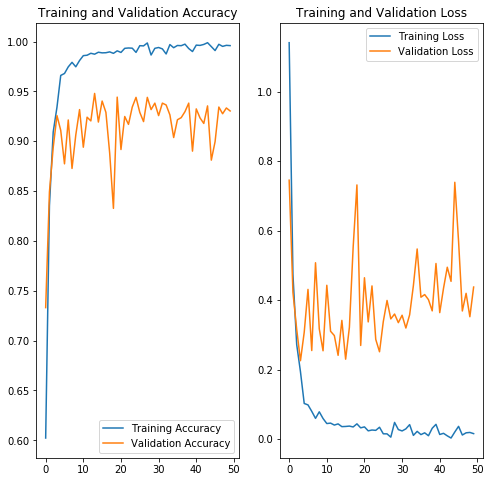

In [20]:
#plotting the accuracy and validation curves but only of the Feature extraction model
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
#Function to give the name to the highest predicted value 
def titlename(arr):
    name=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus']
    for i in range(5):
        loc = np.where(arr[i] == np.amax(arr[i]))
        x = np.array(loc, dtype=np.int64)
        y = x[0][0]
        print(name[y])

In [9]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('tomatoaugwithcnn2.h5')
new_model = tf.keras.models.load_model('tomatoaugwithoutcnn2.h5')

# Show the model architecture
model.summary()
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

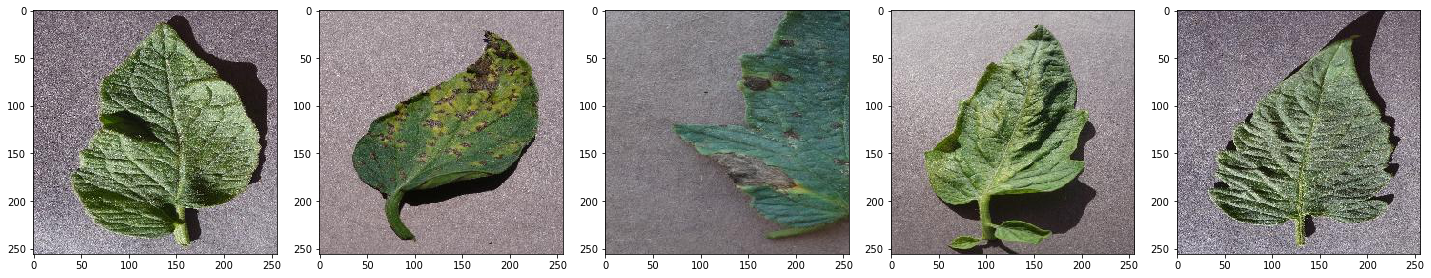

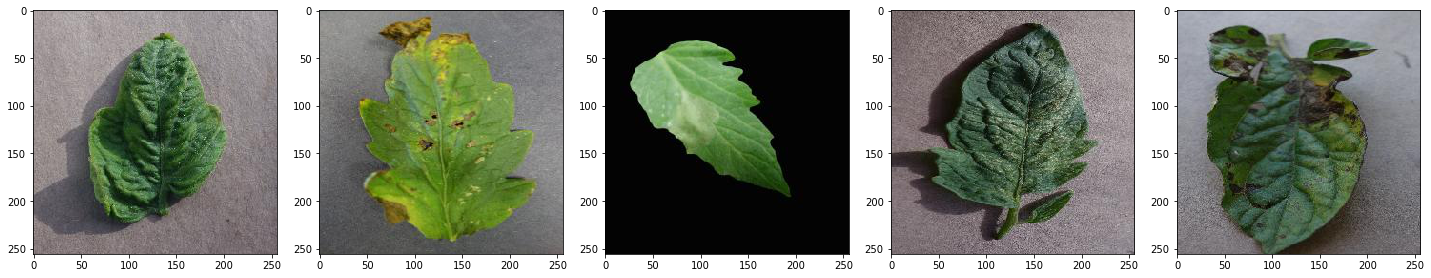

Actual disease 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight

Predicted Disease with cnn 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight

Predicted Disease withou cnn 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight


In [13]:
#augmented_images = [test_batches[1][0][i] for i in range(5)]
# The below function is used to traverse from one batch of data to next batch of image data
imgs2, labels2 = next(test_batches)
plotImages(imgs2)
# The below functions are used to predict and show actual values of data
print("Actual disease ")
print("")
titlename(labels2)
print("")
pred = model.predict(imgs2)
print("Predicted Disease with cnn ")
print("")
titlename(pred)

print("")
pred2 = new_model.predict(imgs2)
print("Predicted Disease withou cnn ")
print("")
titlename(pred2)

In [36]:
print(pred)
print("")
print(pred2 )

[[2.53158248e-07 7.65342338e-06 4.78869370e-05 9.98593271e-01
  6.14337390e-04 1.84955425e-05 6.94441027e-04 1.08286376e-05
  1.19995329e-05 8.28203099e-07]
 [1.35941550e-18 4.16028648e-13 2.88984539e-15 1.00000000e+00
  6.76313672e-09 1.89639675e-11 9.56448869e-14 8.06078468e-12
  9.04306867e-17 1.07698625e-20]
 [5.09747003e-14 6.19115463e-06 3.54741791e-11 9.91781490e-05
  3.17693889e-07 9.99891043e-01 2.35221546e-06 3.67312865e-08
  2.28859385e-08 8.39727079e-07]
 [8.65488747e-09 1.81823600e-06 1.27441518e-03 1.31783762e-03
  9.92437541e-01 3.77889769e-03 7.69135659e-04 6.64617473e-05
  3.44710366e-04 9.09874325e-06]
 [1.00000000e+00 7.39077169e-16 3.21429037e-22 9.19430607e-18
  3.56231961e-16 1.99397789e-16 4.32391031e-24 6.05201267e-25
  1.11074224e-33 5.50462868e-15]]

[[1.30275814e-02 3.38247133e-04 7.96375207e-06 9.71218646e-01
  1.00803584e-06 1.34046297e-06 2.92509139e-06 9.86494615e-06
  1.23276720e-06 1.53911607e-02]
 [1.52441004e-04 1.36899234e-06 2.41093221e-05 9.9972504

In [14]:
# this function does the work of above function but it will give an average of prediction of  both the models and then the resulted model will be given as a result 
def finpred(imgs2,labels2,model,new_model):
    print("Actual disease ")
    print("")
    titlename(labels2)
    print("")
    
    pred1 = model.predict(imgs2)
    print("Predicted Disease with cnn ")
    print("")
    titlename(pred1)

    print("")
    pred2 = new_model.predict(imgs2)
    print("Predicted Disease without cnn ")
    print("")
    titlename(pred2)
    
    final_pred = pred2
    
    for i in range(5):
        for j in range(10):
            final_pred[i][j] = pred1[i][j]+pred2[i][j]/2
    
    
    print("")
    pred2 = new_model.predict(imgs2)
    print("Predicted Disease with average of without cnn and with cnn ")
    print("")
    titlename(final_pred)
    
    return pred,pred2,final_pred

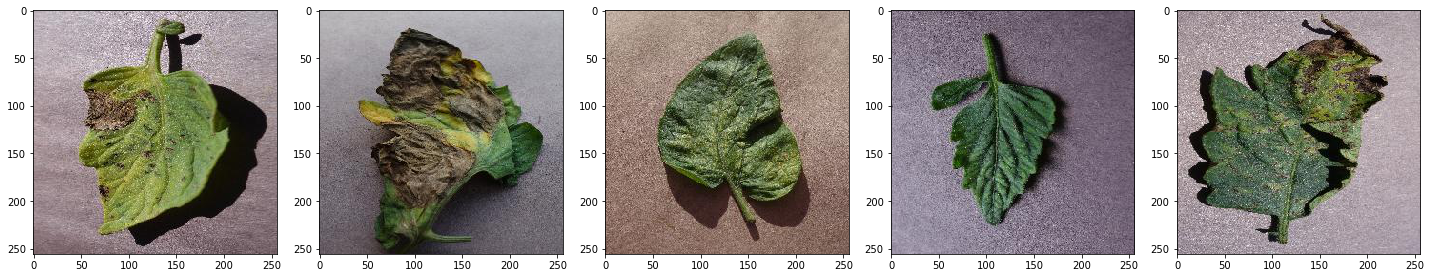

In [15]:
imgs2, labels2 = next(test_batches)
plotImages(imgs2)


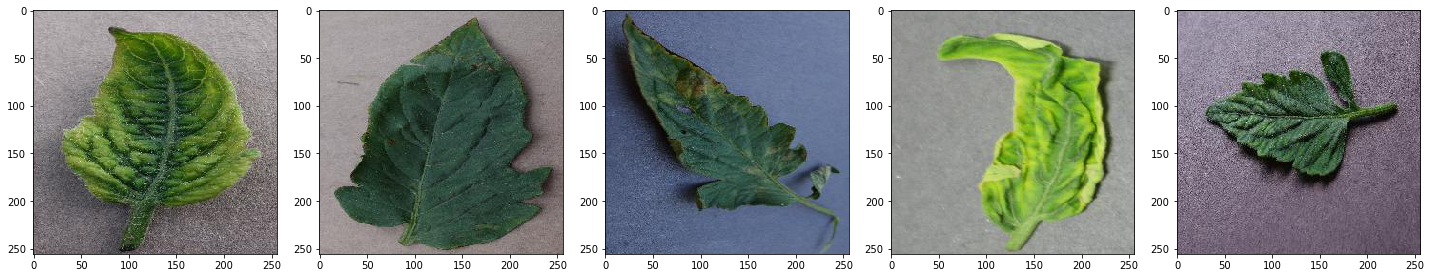

Actual disease 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus

Predicted Disease with cnn 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus

Predicted Disease without cnn 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Bacterial_spot
Tomato___Tomato_mosaic_virus

Predicted Disease with average of without cnn and with cnn 

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus


In [23]:
imgs2, labels2 = next(test_batches)
plotImages(imgs2)

pred1,pred2,final_pred= finpred(imgs2,labels2,model,new_model)

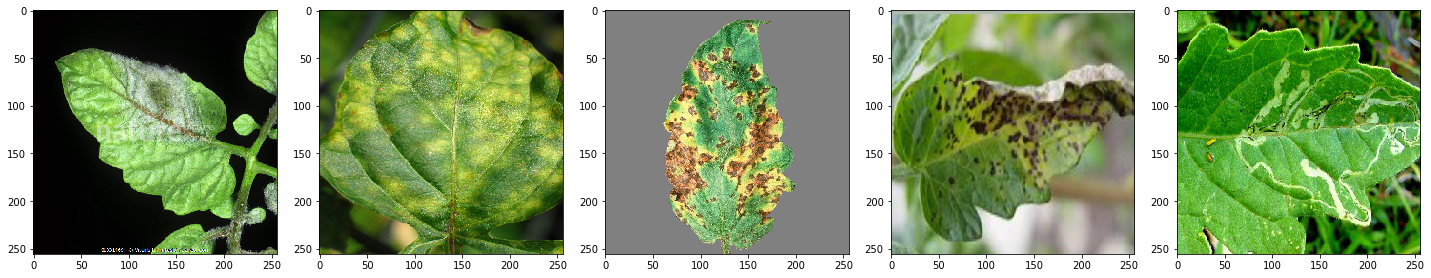

In [24]:
imgs3, labels3 = next(test_batches_custom)
plotImages(imgs3)


In [25]:
pred,pred2,final_pred = finpred(imgs3,labels3,model,new_model)

Actual disease 

Tomato___Bacterial_spot
Tomato___Bacterial_spot
Tomato___Bacterial_spot
Tomato___Bacterial_spot
Tomato___Bacterial_spot

Predicted Disease with cnn 

Tomato___Late_blight
Tomato___Late_blight
Tomato___Septoria_leaf_spot
Tomato___Early_blight
Tomato___Late_blight

Predicted Disease without cnn 

Tomato___Late_blight
Tomato___Late_blight
Tomato___Late_blight
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus

Predicted Disease with average of without cnn and with cnn 

Tomato___Late_blight
Tomato___Late_blight
Tomato___Septoria_leaf_spot
Tomato___Early_blight
Tomato___Late_blight


(array([[5.0096818e-14, 3.7903068e-15, 1.4203026e-19, 7.8444624e-13,
         4.6563629e-15, 1.2850944e-10, 7.9142097e-13, 1.0949251e-13,
         9.2121653e-09, 1.0000000e+00],
        [9.9295133e-01, 3.2028571e-13, 1.0489536e-15, 2.7814610e-12,
         1.4478653e-13, 2.0687352e-07, 3.4876958e-12, 8.8666553e-11,
         1.3769485e-13, 7.0484220e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.2911823e-21, 2.5944888e-20, 2.6735585e-14, 3.7128051e-13,
         2.2196351e-14, 9.2374819e-17, 1.0000000e+00, 6.8757028e-11,
         2.4053288e-13, 1.6509992e-08],
        [8.1869723e-20, 1.0000000e+00, 1.1800025e-21, 6.0058212e-21,
         1.3081703e-18, 5.8498838e-16, 3.2630256e-16, 1.0366423e-13,
         1.5559401e-18, 3.9234110e-17]], dtype=float32),
 array([[5.47500321e-08, 2.75181282e-08, 7.29674383e-08, 9.99999762e-01,
         2.65210992e